<img align="centre" width="750" height="750" img src="https://i0.wp.com/www.creatingentrepreneursinfood.eu/wp-content/uploads/2017/02/GMIT-logo.png">

# Project 2020 - Fundamentals of Data Analysis

* **Author:** John Paul Lee
* **Github:** JPLee01
* **Email:** G00387906@gmit.ie
* **Created:** 30-12-2020, **Last update:** 07-01-2021
* Fundamentals of Data Analysis: Perform and explain simple linear regression using Python on the *powerproduction* dataset
****
This Jupyter Notebook has been created to perform and explain simple linear regression using Python on the *powerproduction* dataset. 

**Lecturer:** Dr. Ian McLoughlin

The Project instructions can be found [here](https://github.com/JPLee01/Fundamentals_of_Data_Analysis-Project_2020/blob/main/Project%20Instructions.pdf)
****

As part of the project this notebook will deal with three main tasks:
1. Performing simple linear regression on the *powerproduction* data set.
2. An explanation of your regression and an analysis of its accuracy.
3. Research and investigation into other types of regression on the *powerproduction* data set and an analysis of its accuracy.

## Preliminaries
Prior to dealing with analysis of the data set we need to import a number of libraries. We need to import the NumPy library as it is essential to synthesise the data set. The Pandas libary will also be imported to allow for analysis of the dat set. The matplotlib and seaborn libaries will also need to be imported to allow for the creation of visualisations in the notebook.

In [1]:
# Import numpy to allow for simulation of the data set.
# Import pandas to allow for analysis of the dat set. 
# Import matplotlib.pyplot and seaborn for the creation of visualisations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Also as we will be displaying Plots in this Jupyter Notebook we will implement the *inline* magic command to allow the Plots to be rendered inline within the Notebook.<sup>[1]</sup>

In [2]:
#Inline Magic command implemented to ensure that the Plots are rendered inline
%matplotlib inline

To ensure uniformity throughout the Juypter Notebook in terms of the the Seaborn Plots display the *style* and *palette* fuction will be set.

The *style* function will be set to *darkgrid*. This will allow for optimal measurments of Plots as the darkened background with the built in grid lines will be best displayed against the white background of the Juypter Notebook.<sup>[2]</sup> 

The *palette* fuction will be set to *bright* as it will allow for clear distinction of multiple outputs within one Plot.<sup>[3]</sup> 

In [3]:
#Setting of Seaborn dispays to enure uniformity throughout the Juypter Notebook
#Darkplot style selected to allow for optimal measurments of Plots
sns.set_style("darkgrid")
#Bright colour palette selected to allow for clear distinction of multiple outputs within one Plot 
sns.set_palette("bright")

## Introduction

To begin this project the author will first look at the field of regression, explaining its meaning, uses and how it can be implemented on the *powerproduction* data set. The author will then analyse the *powerproduction* data set and give an overview of the information contained within it. Next the author will explore the possibility of performing linear regression on the *powerproduction* data set, and analyse it's outcome and accuracy. Other types of regression models will be explored and thier possibility of being used on the *powerproduction* data set will be discussed. Finally a summary and conclusion will be given with regards to the use of regression analysis on the *powerproduction* data set.

## Regression
According to Beers<sup>[4]</sup> regression is: "a statistical method that attempts to determine the strength and character of the relationship between one dependent variable and a series of other variables". Regression is used in many areas including finance where it helps investment and financial managers to value assets and understand the relationships between variables, such as commodity prices and stocks.<sup>[5]</sup> Within regression, regression analysis is concerned with "helping us to analyse and understand the relationship between two or more variables of interest."<sup>[6]</sup> This includes identifying which factors are important, which factors can be ignored and how they influence each other.<sup>[7]</sup> Regression analysis can also highlight trends such as, the connection between how much you eat and how much you weigh.<sup>[8]</sup> 

Within regression analysis there are two broad types of regression:<sup>[9]</sup>
1. Linear Regression - attempts to model the relationship between two variables by fitting a linear equation to observed data.<sup>[10]</sup> 
2. Nonlinear Regression - the observed data conforms to a function which is a nonlinear combination of the model parameters.<sup>[11]</sup> 

An example of both types of regression can be seen in the image below:

<img align="centre" width="600" height="600" img src="https://hackernoon.com/images/h31rz24si.jpg">

Later on in this notebook the author will dicuss both types of regression in greater detail.

Regression can be impelemented on the *powerproduction* data set to help quantify the relationship between the variables, as well as, understand how the value of one variable changes when the other variables is varied.<sup>[12]</sup>

Firstly, before any regression is undertaken the author must analyse data set.

## Analysis of the *Powerproduction* Data Set
To first analyse the data set the author will have to import and read the data set using the pandas.read_csv function.<sup>[13]</sup> The author will use the URL provided for on the Fundamentals of Data Analysis moodle page to import the data set rather than uploading it to thier own repository to ensure a tidier repository. The author will also name the data set *powerproduction_dataset* for ease of coding throughout the notebook.

In [4]:
#Import and read the Data Set
powerproduction_dataset = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
powerproduction_dataset

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


As the data set has been successfully been imported the author will begin analysing the data set. Firstly the author will use the pandas.DataFrame.info function<sup>[14]</sup> to conduct basic analysis by displaying general information about the data set.

In [5]:
#Basic Analysis of the Data Set
print("General Information of the Data Set", "\n")
powerproduction_dataset.info()

General Information of the Data Set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
speed    500 non-null float64
power    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


From the pandas.DataFrame.info function the author can see that the data set contains 500 entries numbered 0-449 and two columns labeled 'speed' and 'power'. As a result the author will assume for the rest of the project that the result for speed are displayed in meters/second (m/s) and the power results are displayed in kilowatt hour (kW h). The data set can also be seen to be 7.9 KB in size.

The author can also see that for both the 'speed' and 'power' columns there is no null or missing data present. However to cross reference that this that author will implement the pandas.isnull command<sup>[15]</sup> which will return a 'true' result if no null or missing data is present. The author will then use python's built-in sum()<sup>[16]</sup> function to add all the 'true' returns and display how much (if any) missing data is present.

In [6]:
#Identify if there are any missing values in the Data Set
powerproduction_dataset.isnull()

,speed,power
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
495,False,False
496,False,False
497,False,False
498,False,False


In [7]:
#Count of the total missing values in the Data Set
print("Total number of missing data present in the data set:")
powerproduction_dataset.isnull().sum()

Total number of missing data present in the data set:


speed    0
power    0
dtype: int64

From the results it can be seen that no missing data is present in the data set. As a result, the author will now begin to analyse the data set in greater detail. Firstly, the author will use the pandas.DataFrame.describe function<sup>[17]</sup> to display the summary statistics of the data set. The author will also use python's built-in round() function<sup>[18]</sup> in conjuction to round the summary statistics to three decimal places. 

In [8]:
#Analysis of the Data Set
print("Summary Statistics of the Data Set (Rounded to 3 Decimal Places):")
round(powerproduction_dataset.describe(),3)

Summary Statistics of the Data Set (Rounded to 3 Decimal Places):


,speed,power
count,500.000,500.000
mean,12.590,48.015
std,7.225,41.615
min,0.000,0.000
25%,6.325,5.288
50%,12.550,41.646
75%,18.775,93.537
max,25.000,113.556


From the summary statistics of the data set it can be seen that while the lowest value for both Speed and Power is 0, in terms of highest value Speed rises to 25 while Power rises up to 113.556. This different can also be seen in the mean figures for both columns, Speed - 12.590 and Power 48.015 respectively. Interstingly as well, the standard deviation for Power is almot 6 times larger than Speeds (41.615 vs. 7.225). This would indicate that Powers results are spread out over quiet a wider range than Speeds.

Also from viewing the Data Set it can be seen that for the first and last five results for power output is 0. To investigate this further to see if this is a trend and perhaps power is only produced once speed is within a certain range the author will use the Pandas.DataFrame.head<sup>[19]</sup>, Pandas.DataFrame.tail<sup>[20]</sup>, Pandas.DataFrame.sample<sup>[21]</sup> and Pandas.DataFrame.slice<sup>[22]</sup> commands. The author will use the Pandas.DataFrame.head and Pandas.DataFrame.tail commands to investigate the first and last ten results for the data set to see does the power output remain at 0. The author will use the Pandas.DataFrame.sample command to return a random sample from the data set and see if there is any change in the power output. Finally the author will use the Pandas.DataFrame.slice command to return the result for the middle rows of the data set (245-255) to see perhaps does the power output follow a normal distribution and peak in the middle of the data set.

In [9]:
print("Sample of the First 10 Rows of Data:")
powerproduction_dataset.head(10)

Sample of the First 10 Rows of Data:


,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [10]:
print("Sample of the Last 10 Rows of Data:")
powerproduction_dataset.tail(10)

Sample of the Last 10 Rows of Data:


,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [11]:
print("Random sample of 10 Rows of Data:")
powerproduction_dataset.sample(10)

Random sample of 10 Rows of Data:


,speed,power
197,10.110,26.427
407,20.170,96.963
36,1.652,7.221
422,21.071,96.348
204,10.285,20.636
31,1.301,0.000
132,6.757,1.530
100,5.280,0.113
130,6.682,10.044
137,6.982,4.187


In [12]:
print("Sample of Rows 245-255 of Data:")
powerproduction_dataset[245:255]

Sample of Rows 245-255 of Data:


,speed,power
245,12.387,37.159
246,12.412,52.952
247,12.462,44.745
248,12.487,44.735
249,12.538,44.801
250,12.563,42.336
251,12.588,54.079
252,12.613,51.471
253,12.663,44.880
254,12.713,51.149


As we can see from the results it appears that after speed reaches .325 m/s that power is produced. From the sample command it does not appear that speed vs. power follows a certain ration e.g. power is twice as the result of speed. However it can be assumed that speed vs. power does generally follow an upward trajectory i.e. when speed rises so does power. 

It should also be noted though that from the tail result it also appears that after speed reaches a certain level that no power is produced. As the certain level of speed is not yet estabilshed the author will again use the Pandas.DataFrame.slice command and slice the rows 480-495 to see if perhaps the upper level of speed to stop producing power can be established. 

In [13]:
print("Sample of Rows 480-495 of Data:")
powerproduction_dataset[480:495]

Sample of Rows 480-495 of Data:


,speed,power
480,23.974,94.270
481,24.024,105.992
482,24.049,93.524
483,24.174,95.869
484,24.199,101.419
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117


From further analyis the author can now see that after speed reaches 24.5 m/s the power output plummets and from that point onwards no power is produced. This is an interesting discovery and perhaps would point to something like a capacity issue of being able to convert high speeds into power. 

From the analysis of the data set the author has been able to make the following three observations:
* Before speeds of .325 m/s no power is produced.
* In general terms the speed vs. power relationship does follow an upward trajectory.
* After speeds of 24.5 m/s no power is produced.

In order to validate these observations the author will plot the data set and visually check if they hold true.

In [14]:
#Set the size output to improve analysis 
plt.rcParams['figure.figsize'] = (25, 15)

Text(0.5, 0.98, 'Powerproduction Data Set')

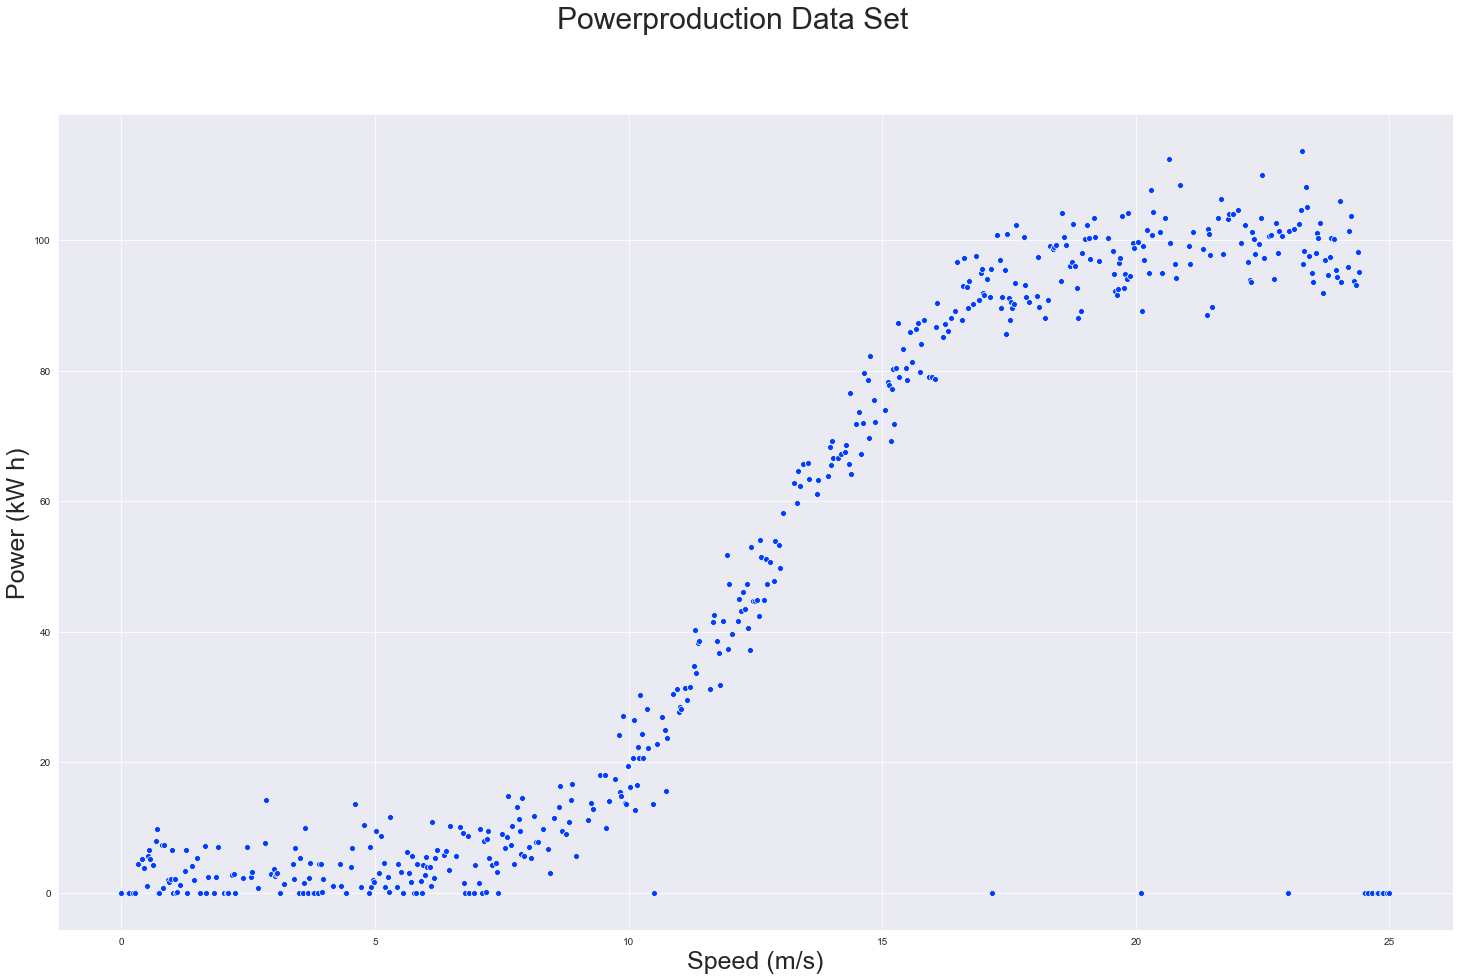

In [15]:
#Plotting of the Data Set on a Scatter Plot
sns.scatterplot(data=powerproduction_dataset, x='speed', y='power',
    sizes=(250, 250), legend="full")
plt. xlabel('Speed (m/s)', fontsize=25)
plt. ylabel('Power (kW h)', fontsize=25)
plt. suptitle('Powerproduction Data Set', fontsize=30)

As can be seen from the visualisation the data set seems to follow a 'S Type' curve that is to say it is flatter at the beginning and end and steeper in the middle. While very popular in the Project Management sphere,<sup>[23]</sup> (an S curve is the appropriate cumulative data for a project or task, such as, the cost, or man-hours plotted against time<sup>[24]</sup>) the S cuvre can tell a lot with regards to the *powerproduction* data set.

Firstly it can be seen that generally when the speed is quiet low (below 6 m/s) very little if any power is produced. This confirms the authors first observation from  analysis of the data set. Secondly, after 6 m/s of speed is generated power seems to be produced output at an exponential rate, again backing up the author second claim that in general terms the speed vs. power relationship follows an upward trajectory. Lastly it can be seen that generally once more than 20 m/s of speed is generated the power output plateaus. 

From analysis of the visualisation the author would argue that the *powerproduction* data set follows a logistic growth model. Normally used to describe population growth over time, logistic growth is when the growth rate of an entity decreases as it approaches a maximum imposed by limited resources.<sup>[25]</sup> An example of the logistic growth model (for populations over time) can be seen in the image below:

<img align="centre" width="400" height="400" img src="https://fastly.kastatic.org/ka-perseus-images/5cbb382cc7a53196a402172da5c2fed32c2134ff.png">

As can be seen in the image the limited resource is the carrying capacity of the environment i.e the maximum number of organisms that an ecosystem can sustainably support.<sup>[26]</sup> For the *powerproduction* data set the limited resource could be somethig like the inability to efficiently convert speed into power after a certain point. 

Within the visualisation it should also be noted that sporadically no power appears to be produced no matter what speed is generated. These points it could be argued could be classed as outliers. An outlier is an observation that lies outside the overall pattern of a distribution.<sup>[27]</sup> Outliers may be present for a number of reasons including erroneous data, measurment error or input error.<sup>[28]</sup> While some academics would argue that outliers should be dropped as they would affect the mean, standard deviation, and correlation results<sup>[29]</sup>, for the purpose of this project the author will leave the outliers present as it increases the validity of any future calculations. 

Now that the the *powerproduction* data set has been fully analysed the author will attempt to perform simple linear regression on the data set.

## Simple Linear Regression
As stated earlier linear regression is focused on modeling the relationship between two variables by fitting a linear equation to observed data.<sup>[30]</sup> Simple linear regression, a subset of linear regression, uses one independent variable to explain or predict the outcome of the other dependent variable.<sup>[31]</sup> In the case of the *powerproduction* data set the independent variable would be Speed and the dependent variable would be Power as speed is required to produce power.

To calculate simple linear regression the formula $y = mx + c$ is used, which is the general equation of a straight line.<sup>[32]</sup> Where $m$ is the gradient, representing the rate of change i.e. how much $y$ increases by when $x$ is increased by 1.0 and $c$ is the intercept on the y-axis i.e. the value of $y$ when $x$ is 0.<sup>[33]</sup>

To fit a straight line to the *powerproduction* data set values for $m$ and $c$ must be selected. These values (or parameters as they are also know<sup>[34]</sup>) ideally would represent the best possible values in terms of reflection of the *powerproduction* data set i.e. as close as possible to the data set results. 

The author will now randomly select three values for $m$ and $c$ :
1. $m=1$ and $c=3$
2. $m=3$ and $c=5$
3. $m=5$ and $c=10$

The author will now plot these randomly selected values over the *powerproduction* data set and examine for accuracy.

(Special mention should be given to Dr. Ian McLoughlin's [github](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb)<sup>[35]</sup> which explains Simple Linear Regression with NumPy and was used as inspiration for the rest of the section. 

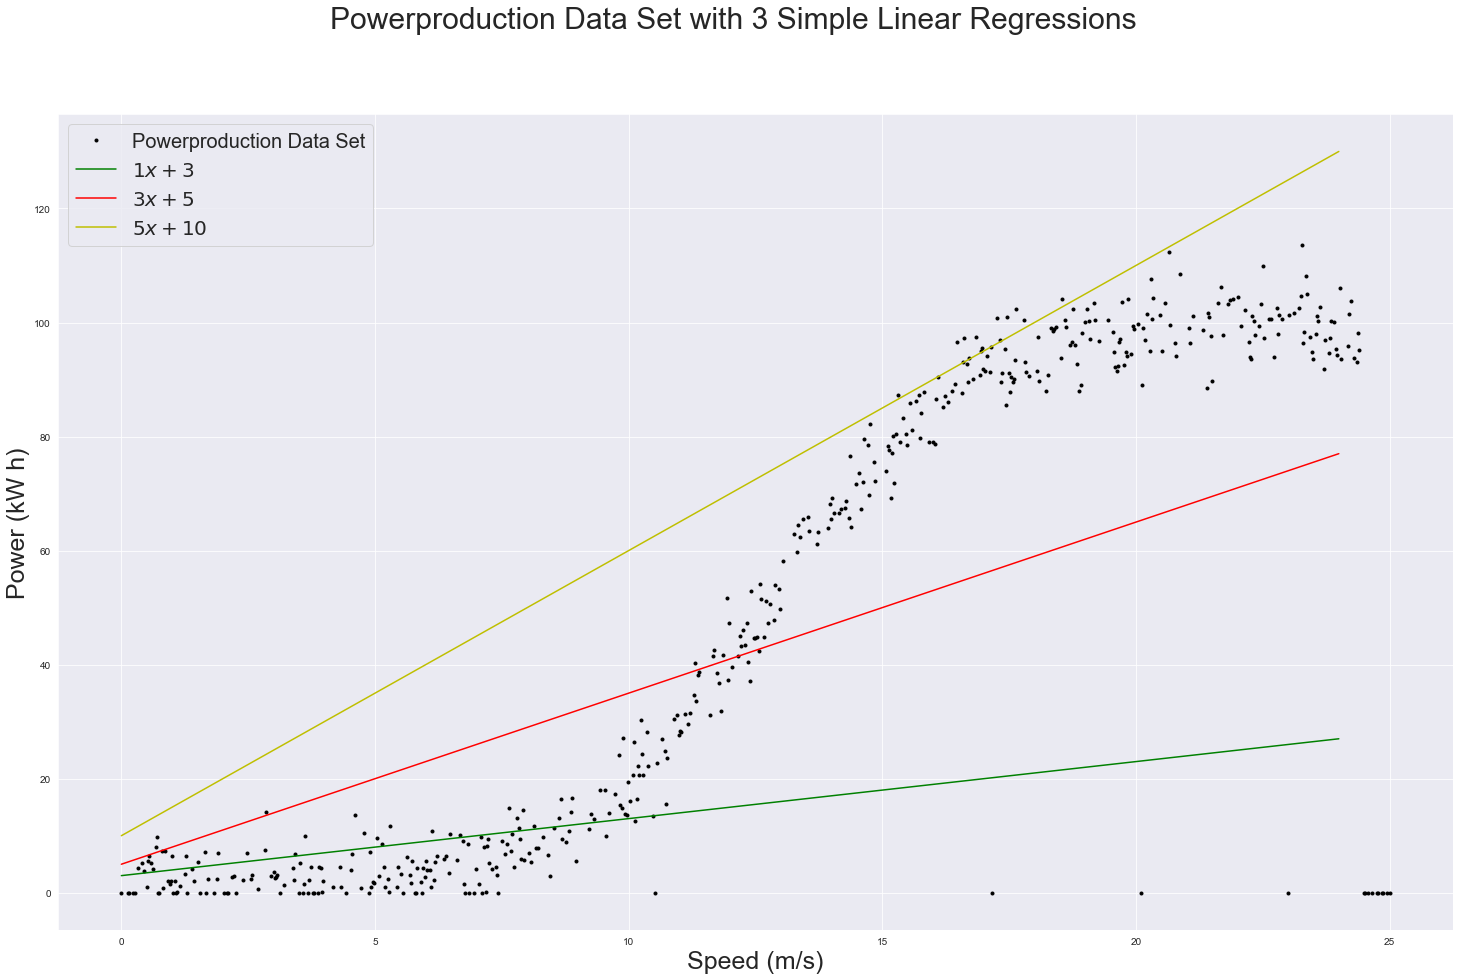

In [16]:
#Plot the Powerproduction Data Set
plt.plot(powerproduction_dataset.speed, powerproduction_dataset.power, 'k.', label="Powerproduction Data Set")

#Create an array of 0 to 25 to allow the selected linear regression examples extend to the end of the Powerproduction Data Set
x = np.arange(0.0, 25.0, 1.0)

#Plot the randomly selected M and C values over the Powerproduction Data Set
plt.plot(x, 1.0 * x + 3.0, 'g-', label=r"$1x + 3$")
plt.plot(x, 3.0 * x +  5.0, 'r-', label=r"$3x +  5$")
plt.plot(x, 5.0 * x + 10.0, 'y-', label=r"$5x + 10$")

#Label the Axis
plt.xlabel('Speed (m/s)', fontsize=25)
plt.ylabel('Power (kW h)', fontsize=25)

#Insert a legend
plt.legend(fontsize=20)

#Insert a Title
plt. suptitle('Powerproduction Data Set with 3 Simple Linear Regressions', fontsize=30)

#Disply the Plot
plt.show()

As we can see from randomly sleectimg three different values for $m$ and $c$ three very different lines are created. While these lines have varying levels of accuracey with regards to accuracy it can be conlcueded that none of the lines arepresent the best possible values in terms of reflection of the data set. 

In order to determine the best possible values the author will calculate the mean and averages for the Speed and Power variables. The author will then caclulate the figures for the Speed and Power varialbes minus the means for each variable. These figures will then be used to calculate the $m$ value. To calculate this the author will; divide the sum of the earlier figures (Variables minus the means) multiplied by each other, against the sum of the Speed earlier figure squared. To clculate the $c$ value the author will multiply the Power mean minus the $m$ value by the Speed average. 

A further in-depth decription of the above calculations can be viewed in the work of Varsity Tutors<sup>[36]</sup> and Matt Stanford.<sup>[37]</sup> The below code is inspired by the earlier highlighted work of Dr. Ian McLoughlin.<sup>[35]</sup> 

In [17]:
#Calculate the best values for M and C

#First calculate the means (or averages) of Speed and Power
speed_avg = np.mean(powerproduction_dataset.speed)
power_avg = np.mean(powerproduction_dataset.power)

#Subtract means from Speed and Power.
speed_zero = powerproduction_dataset.speed - speed_avg
power_zero = powerproduction_dataset.power - power_avg

#The best M is found by the following calculations:
m = np.sum(speed_zero * power_zero) / np.sum(speed_zero * speed_zero)

#Use M from above to calculate the best C value:
c = power_avg - m * speed_avg

#Print the results
print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.917596 and c is -13.899903.


The author can compare these results to the results calculated using the numpy.polyfit<sup>[38]</sup> function. This function utilises the least squares method to calculate the $m$ and $c$ results i.e. employes the Gauss–Markov theorem<sup>[39]</sup> to minimizes the variance of the unbiased estimators of the coefficients.<sup>[40]</sup>

In [23]:
# Creation of coefficient variables i.e. best fit values or lowest cost for m and c
# They are outputted as arrays
coeffs1 = np.polyfit(powerproduction_dataset['speed'], powerproduction_dataset['power'], 1)
coeffs1

array([  4.91759567, -13.89990263])

As can be seen the results generated from the numpy.polyfit<sup>[38]</sup> function are exceptionally to the earlier calculated results. These results will now be plotted against the *powerproduction* data set for accuracy.

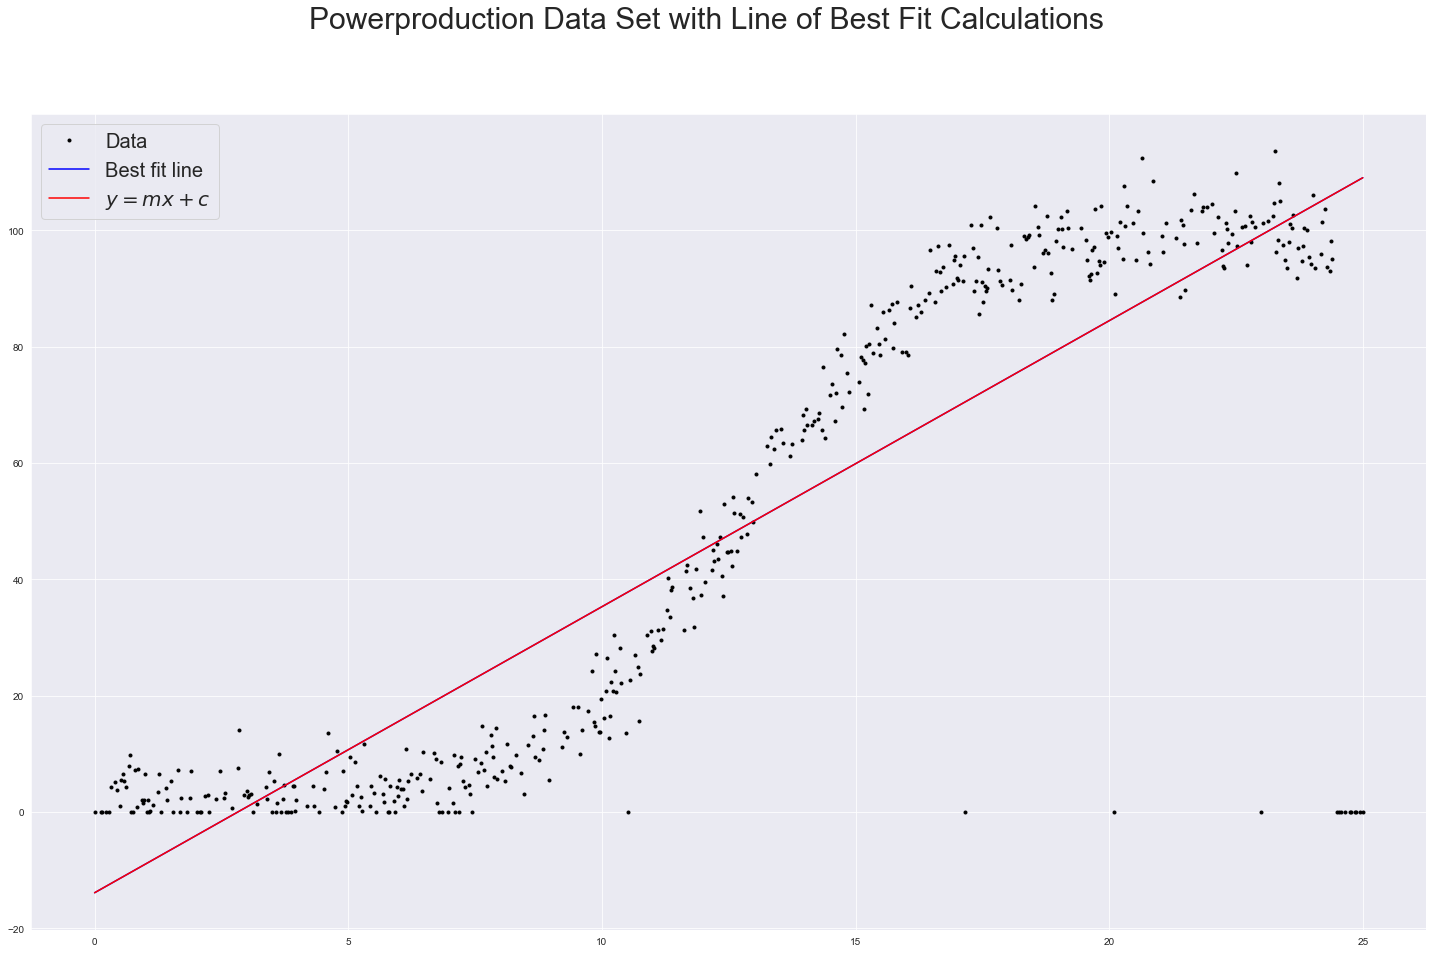

In [21]:
# Plotting the dataset and its best fit lines
plt.plot(powerproduction_dataset['speed'], powerproduction_dataset['power'], 'k.', label='Data');
plt.plot(powerproduction_dataset['speed'], m * powerproduction_dataset['speed'] + c, 'b-', label='Best fit line')
plt.plot(powerproduction_dataset['speed'], coeffs1[0] * powerproduction_dataset['speed'] + coeffs1[1], 'r-', label='$ y=mx+c $')

#Label the Axis
plt.xlabel('Speed (m/s)', fontsize=25)
plt.ylabel('Power (kW h)', fontsize=25)

#Insert a legend
plt.legend(fontsize=20)

#Insert a Title
plt. suptitle('Powerproduction Data Set with Line of Best Fit Calculations', fontsize=30)

#Disply the Plot
plt.show()

From the above visualisation both the earlier calculated results and numpy.polyfit function plots are essentially identical, as can be seen by the presence of only one line. While both these plots indicate the line of best fit in terms of a simple linear regression to the Data Set, it can be argued that simple linear regression does not best represent the relationship between Speed and Power. This argument is strengthened by the presence of a large number of residuals. A residual is classed as the deviation from the fitted line to the observed values,<sup>[10]</sup> or in laymans terms, the difference between the actual vale and the expected value from the regression models calculations.<sup>[41]</sup> A graphical representation of residuals can be seen in the image below:

<img align="centre" width="600" height="600" img src="https://miro.medium.com/max/1848/1*uoGLR9T-6_1hIlPhu2d_rg.png">


An examination of the residuals allows the author to investigate the validity that a linear relationship exists. While on the broadest terms a linear relationship does appear to exist i.e. the data set does generally follow an upward curve, in reality a linear relationship would not be the most accurate discription of the data set and instead would be more classed as a non-linear relationship. 

The author will now examine the possibility of applying a non-linear relationship to the *powerproduction* data set.

## Non-Linear Regression



Most problems that were initially overlooked when diagnosing the variables in the model or were impossible to see, will, turn up in the residuals, for instance:
* Outliers that have been overlooked, will show up ... as, often, very big residuals.
* If the relationship is not linear, some structure will appear in the residuals
* Non-constant variation of the residuals (heteroscedasticity)
* If groups of observations were overlooked, they'll show up in the residualsmetc.

### Sub Sections - Lurking Variables & Extrapolation

In [ ]:
# Creation of best fit coefficient variables
coeffs4 = np.polyfit(powerproduction_dataset['speed'], powerproduction_dataset['power'], 4)
coeffs4

## References
----------------------------------------------------

<a name="myfootnote1">1</a>: Stack Overflow - Purpose of “%matplotlib inline”, <https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline/43028034>

<a name="myfootnote2">2</a>: The Python Graph Gallery - 104 Seaborn Themes, <https://python-graph-gallery.com/104-seaborn-themes/>

<a name="myfootnote3">3</a>: Seaborn - Choosing color palettes, <https://seaborn.pydata.org/tutorial/color_palettes.html>

<a name="myfootnote4">4</a>: Brian Beers - Regression Definition, <https://www.investopedia.com/terms/r/regression.asp>

<a name="myfootnote5">5</a>: Jim Frost - When Should I Use Regression Analysis?, <https://statisticsbyjim.com/regression/when-use-regression-analysis/>

<a name="myfootnote6">6</a>: Prashanth Ashok - What is Regression? Definition of Regression?, <https://www.mygreatlearning.com/blog/what-is-regression/>

<a name="myfootnote7">7</a>: Coporate Finance Institute - Regression Analysis, <https://corporatefinanceinstitute.com/resources/knowledge/finance/regression-analysis/>

<a name="myfootnote8">8</a>: Stephanie Glen - Regression Analysis, <https://www.statisticshowto.com/probability-and-statistics/regression-analysis/>

<a name="myfootnote9">9</a>: Jim Frost - How to Choose Between Linear and Nonlinear Regression, <https://statisticsbyjim.com/regression/choose-linear-nonlinear-regression/>

<a name="myfootnote10">10</a>: Yale University - Linear Regression, <http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm>

<a name="myfootnote11">11</a>: Science Direct - Nonlinear Regression, <https://www.sciencedirect.com/topics/mathematics/nonlinear-regression>

<a name="myfootnote12">12</a>: WebFOCUS RStat - Explanation of the Regression Model, <https://webfocusinfocenter.informationbuilders.com/wfappent/TLs/TL_rstat/source/LinearRegression41.htm>

<a name="myfootnote13">13</a>: Pandas Manual Version 1.2.0 - pandas.read_csv, <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html>

<a name="myfootnote14">14</a>: Pandas Manual Version 1.2.0 - pandas.DataFrame.info, <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html>

<a name="myfootnote15">15</a>: Pandas Manual Version 1.2.0 - pandas.isnull, <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html>

<a name="myfootnote16">16</a>: Geeks for Geeks - sum() function in Python, <https://www.geeksforgeeks.org/sum-function-python/>

<a name="myfootnote17">17</a>: Pandas Manual Version 1.2.0 - pandas.DataFrame.describe, <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe>

<a name="myfootnote18">18</a>: David Amos - How to Round Numbers in Python, <https://realpython.com/python-rounding/>

<a name="myfootnote19">19</a>: Pandas Manual Version 1.2.0 - pandas.DataFrame.head, <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head>

<a name="myfootnote20">20</a>: Pandas Manual Version 1.2.0 - pandas.DataFrame.tail, <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html?highlight=tail#pandas.DataFrame.tail>

<a name="myfootnote21">21</a>: Pandas Manual Version 1.2.0 - pandas.DataFrame.sample, <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html?highlight=sample#pandas.DataFrame.sample>

<a name="myfootnote22">22</a>: Pandas Manual Version 1.2.0 - Indexing and selecting data, <https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html>

<a name="myfootnote23">23</a>: David Garland - What is an S-curve?, <http://www.maxwideman.com/guests/s-curve/what.htm>

<a name="myfootnote24">24</a>: N Task Manager - Everything You Need to Know about S-Curve in Project Management, <https://www.ntaskmanager.com/blog/s-curve-in-project-management/>

<a name="myfootnote25">25</a>: Kahn Academy - Exponential & logistic growth, <https://www.khanacademy.org/science/ap-biology/ecology-ap/population-ecology-ap/a/exponential-logistic-growth>

<a name="myfootnote26">26</a>: Biology Dictionary - Carrying Capacity, <https://biologydictionary.net/carrying-capacity/>

<a name="myfootnote27">27</a>: Wolfram Mathworld - Outlier, <https://mathworld.wolfram.com/Outlier.html>

<a name="myfootnote28">28</a>: Alex Birkett - How to Deal with Outliers in Your Data, <https://cxl.com/blog/outliers/>

<a name="myfootnote29">29</a>: Karen Grace-Martin - Outliers: To Drop or Not to Drop, <https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/>

<a name="myfootnote30">30</a>: Science Direct - Linear Regression, <https://www.sciencedirect.com/topics/mathematics/linear-regression>

<a name="myfootnote31">31</a>: Penn State - What is Simple Linear Regression?, <https://online.stat.psu.edu/stat462/node/91/>

<a name="myfootnote32">32</a>: BBC - Straight line graphs, <https://www.bbc.co.uk/bitesize/guides/z9387p3/revision/3>

<a name="myfootnote33">33</a>: Math Centre - Equations of straight lines, <https://www.mathcentre.ac.uk/resources/uploaded/mc-ty-strtlines-2009-1.pdf>

<a name="myfootnote34">34</a>: Jason Brownlee - What is the Difference Between a Parameter and a Hyperparameter?, <https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/>

<a name="myfootnote35">35</a>: Dr. Ian McLoughlin - Simple Linear Regression with NumPy, <https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb>

<a name="myfootnote36">36</a>: Varsity Tutors - Line of Best Fit (Least Square Method), <https://www.varsitytutors.com/hotmath/hotmath_help/topics/line-of-best-fit>

<a name="myfootnote37">37</a>: Matt Stanford - Simple Linear Regression in Python, <https://medium.com/@mjfstanford/simple-linear-regression-in-python-905b759ef0e6>

<a name="myfootnote38">38</a>: Numpy Manual Version 1.19 - numpy.polyfit, <https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html>

<a name="myfootnote39">39</a>: Econometrics - The Gauss-Markov Theorem, <https://www.econometrics-with-r.org/5-5-the-gauss-markov-theorem.html>

<a name="myfootnote40">40</a>: Neutrium - Fitting of a Polynomial Using Least Squares Method, <https://neutrium.net/mathematics/least-squares-fitting-of-a-polynomial/>

<a name="myfootnote41">41</a>: Eugene Horber - Analysis of Residuals, <http://www.unige.ch/ses/sococ/cl////stat/action/analyse_residuals0.html?>

<a name="myfootnote42">42</a>: 

## Bibliography
----------------------------------------------------

Within the course of this project the following sources were also used for research purposes:

* Shane Lynn - Python Pandas read_csv – Load Data from CSV Files, <https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/>

* Ritika Singh - Exploratory Data Analysis(EDA) in Python!, <https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/>

* Kahn Academy - Identifying outliers with the 1.5xIQR rule, <https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule>

* University of Canterbury Statistical Consulting Unit - Outliers: why do they occur and how to deal with them, <https://ucscu.wordpress.com/2015/07/16/outliers-why-do-they-occur-and-how-to-deal-with-them/>

* Jim Frost - Guidelines for Removing and Handling Outliers in Data, <https://statisticsbyjim.com/basics/remove-outliers/>

* Yufeng - Extract Rows/Columns from A Dataframe in Python & R, <https://towardsdatascience.com/extract-rows-columns-from-a-dataframe-in-python-r-678e5b6743d6>

* Pranav Gupta - Linear Regression in Python with Pandas & Scikit-Learn, <https://becominghuman.ai/linear-regression-in-python-with-pandas-scikit-learn-72574a2ec1a5>

* Adi Bronshtein - Simple and Multiple Linear Regression in Python, <https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9>

* Animesh Agarwal - Linear Regression using Python, <https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2>

* Stack Overflow - Code for best fit straight line of a scatter plot in python, <https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python>

* Aidan Wilson - Simple Linear Regression in Python (From Scratch), <https://towardsdatascience.com/simple-linear-regression-in-python-numpy-only-130a988c0212>

* Stephanie Glen - Residual Values (Residuals) in Regression Analysis, <https://www.statisticshowto.com/residual/>

* 